# **Skincare Product Recommender System**



<p align="right">by Annisa Mufidatun Sholihah</p>

## **Import library dan dataset**

**Import library that needed**

In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error, mean_absolute_error
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import RootMeanSquaredError
import random

**Import dataset from kaggle**

[link to dataset](https://www.kaggle.com/datasets/nadyinky/sephora-products-and-skincare-reviews)

In [2]:
#import kaggle dataset
!pip install kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d nadyinky/sephora-products-and-skincare-reviews
!unzip sephora-products-and-skincare-reviews.zip

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/nadyinky/sephora-products-and-skincare-reviews
License(s): Attribution 4.0 International (CC BY 4.0)
 93% 136M/147M [00:02<00:00, 97.0MB/s]
100% 147M/147M [00:02<00:00, 74.3MB/s]
Archive:  sephora-products-and-skincare-reviews.zip
  inflating: product_info.csv        
  inflating: reviews_0-250.csv       
  inflating: reviews_1250-end.csv    
  inflating: reviews_250-500.csv     
  inflating: reviews_500-750.csv     
  inflating: reviews_750-1250.csv    


## **Create dataset**

create data frame for **product** dataset

In [3]:
product = pd.read_csv('/content/product_info.csv')
product

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,NaN,NaN,NaN,...,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
1,P473668,La Habana Eau de Parfum,6342,19-69,3827,4.1538,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,85.0,30.0
2,P473662,Rainbow Bar Eau de Parfum,6342,19-69,3253,4.2500,16.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
3,P473660,Kasbah Eau de Parfum,6342,19-69,3018,4.4762,21.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
4,P473658,Purple Haze Eau de Parfum,6342,19-69,2691,3.2308,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8489,P467659,Couture Clutch Eyeshadow Palette,1070,Yves Saint Laurent,2790,4.4286,7.0,NaN,NaN,NaN,...,0,0,0,NaN,Makeup,Eye,Eye Palettes,0,NaN,NaN
8490,P500874,L'Homme Eau de Parfum,1070,Yves Saint Laurent,2319,4.6367,556.0,2 oz / 60 mL,Size + Concentration + Formulation,2 oz / 60 mL eau de parfum spray,...,0,0,0,"['Layerable Scent', 'Woody & Earthy Scent']",Fragrance,Men,Cologne,1,129.0,129.0
8491,P504428,Mon Paris Eau de Parfum Gift Set,1070,Yves Saint Laurent,1475,5.0000,2.0,NaN,NaN,NaN,...,1,1,0,NaN,Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
8492,P504448,Y Eau de Parfum Gift Set,1070,Yves Saint Laurent,840,NaN,NaN,NaN,NaN,NaN,...,1,0,0,NaN,Fragrance,Value & Gift Sets,Cologne Gift Sets,0,NaN,NaN


Merged all review dataset into one DataFrame **reviews**

In [4]:
review_0 = pd.read_csv('/content/reviews_0-250.csv')
review_1 = pd.read_csv('/content/reviews_250-500.csv')
review_2 = pd.read_csv('/content/reviews_500-750.csv')
review_3 = pd.read_csv('/content/reviews_750-1250.csv')
review_4 = pd.read_csv('/content/reviews_1250-end.csv')


# Gabungkan semua file review menjadi satu DataFrame
reviews = pd.concat([review_0, review_1, review_2, review_3, review_4], ignore_index=True)
reviews

<ipython-input-4-e6c83cb43a7a>:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  review_0 = pd.read_csv('/content/reviews_0-250.csv')
<ipython-input-4-e6c83cb43a7a>:4: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  review_3 = pd.read_csv('/content/reviews_750-1250.csv')
<ipython-input-4-e6c83cb43a7a>:5: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  review_4 = pd.read_csv('/content/reviews_1250-end.csv')


,Unnamed: 0,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
0,0,1741593524,5,1.0,1.0,2,0,2,2023-02-01,I use this with the Nudestix “Citrus Clean Bal...,Taught me how to double cleanse!,NaN,brown,dry,black,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0
1,1,31423088263,1,0.0,NaN,0,0,0,2023-03-21,I bought this lip mask after reading the revie...,Disappointed,NaN,NaN,NaN,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
2,2,5061282401,5,1.0,NaN,0,0,0,2023-03-21,My review title says it all! I get so excited ...,New Favorite Routine,light,brown,dry,blonde,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
3,3,6083038851,5,1.0,NaN,0,0,0,2023-03-20,I’ve always loved this formula for a long time...,Can't go wrong with any of them,NaN,brown,combination,black,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
4,4,47056667835,5,1.0,NaN,0,0,0,2023-03-20,"If you have dry cracked lips, this is a must h...",A must have !!!,light,hazel,combination,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1094406,49972,2276253200,5,1.0,NaN,0,0,0,2023-03-13,Consider salicylic acid your secret weapon for...,NaN,fair,brown,combination,NaN,P505392,Multi Action Clear Acne Clearing Treatment Lot...,StriVectin,49.0
1094407,49973,28013163278,5,1.0,NaN,0,0,0,2023-03-13,I’ve been using this as my only moisturizer fo...,NaN,NaN,blue,combination,blonde,P505392,Multi Action Clear Acne Clearing Treatment Lot...,StriVectin,49.0
1094408,49974,1539813076,5,1.0,NaN,0,0,0,2023-03-13,I got breakouts whenever it’s my time of month...,NaN,light,blue,combination,blonde,P505392,Multi Action Clear Acne Clearing Treatment Lot...,StriVectin,49.0
1094409,49975,5595682861,5,1.0,NaN,0,0,0,2023-03-13,I love this!!! I don’t get actual acne just an...,NaN,fair,hazel,oily,NaN,P505392,Multi Action Clear Acne Clearing Treatment Lot...,StriVectin,49.0


## **Exploratory Data Analysis**

Displays information about the 'product' and 'reviews' DataFrames, including their data types and non-null counts. It then prints out the column names for both DataFrames, providing an overview of the structure and content of each dataset.

In [5]:
product.shape

(8494, 27)

In [6]:
reviews.shape

(1094411, 19)

In [7]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8494 entries, 0 to 8493
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          8494 non-null   object 
 1   product_name        8494 non-null   object 
 2   brand_id            8494 non-null   int64  
 3   brand_name          8494 non-null   object 
 4   loves_count         8494 non-null   int64  
 5   rating              8216 non-null   float64
 6   reviews             8216 non-null   float64
 7   size                6863 non-null   object 
 8   variation_type      7050 non-null   object 
 9   variation_value     6896 non-null   object 
 10  variation_desc      1250 non-null   object 
 11  ingredients         7549 non-null   object 
 12  price_usd           8494 non-null   float64
 13  value_price_usd     451 non-null    float64
 14  sale_price_usd      270 non-null    float64
 15  limited_edition     8494 non-null   int64  
 16  new   

In [8]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094411 entries, 0 to 1094410
Data columns (total 19 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   Unnamed: 0                1094411 non-null  int64  
 1   author_id                 1094411 non-null  object 
 2   rating                    1094411 non-null  int64  
 3   is_recommended            926423 non-null   float64
 4   helpfulness               532819 non-null   float64
 5   total_feedback_count      1094411 non-null  int64  
 6   total_neg_feedback_count  1094411 non-null  int64  
 7   total_pos_feedback_count  1094411 non-null  int64  
 8   submission_time           1094411 non-null  object 
 9   review_text               1092967 non-null  object 
 10  review_title              783757 non-null   object 
 11  skin_tone                 923872 non-null   object 
 12  eye_color                 884783 non-null   object 
 13  skin_type                 9

In [9]:
# List columns in the 'product' DataFrame
print("Columns in 'product' DataFrame:")
print(product.columns.tolist())

# List columns in the 'reviews' DataFrame
print("\nColumns in 'reviews' DataFrame:")
print(reviews.columns.tolist())


Columns in 'product' DataFrame:
['product_id', 'product_name', 'brand_id', 'brand_name', 'loves_count', 'rating', 'reviews', 'size', 'variation_type', 'variation_value', 'variation_desc', 'ingredients', 'price_usd', 'value_price_usd', 'sale_price_usd', 'limited_edition', 'new', 'online_only', 'out_of_stock', 'sephora_exclusive', 'highlights', 'primary_category', 'secondary_category', 'tertiary_category', 'child_count', 'child_max_price', 'child_min_price']

Columns in 'reviews' DataFrame:
['Unnamed: 0', 'author_id', 'rating', 'is_recommended', 'helpfulness', 'total_feedback_count', 'total_neg_feedback_count', 'total_pos_feedback_count', 'submission_time', 'review_text', 'review_title', 'skin_tone', 'eye_color', 'skin_type', 'hair_color', 'product_id', 'product_name', 'brand_name', 'price_usd']


View summary statistics for the numeric columns in both the 'product' and 'reviews' DataFrames.

In [10]:
product.describe()

,brand_id,loves_count,rating,reviews,price_usd,value_price_usd,sale_price_usd,limited_edition,new,online_only,out_of_stock,sephora_exclusive,child_count,child_max_price,child_min_price
count,8494.000000,8.494000e+03,8216.000000,8216.000000,8494.000000,451.000000,270.000000,8494.000000,8494.000000,8494.000000,8494.000000,8494.000000,8494.000000,2754.000000,2754.000000
mean,5422.440546,2.917957e+04,4.194513,448.545521,51.655595,91.168537,20.207889,0.070285,0.071698,0.219096,0.073699,0.279374,1.631622,53.792023,39.665802
std,1709.595957,6.609212e+04,0.516694,1101.982529,53.669234,79.195631,24.327352,0.255642,0.258002,0.413658,0.261296,0.448718,5.379470,58.765894,38.685720
min,1063.000000,0.000000e+00,1.000000,1.000000,3.000000,0.000000,1.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000
25%,5333.000000,3.758000e+03,3.981725,26.000000,25.000000,45.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,19.000000
50%,6157.500000,9.880000e+03,4.289350,122.000000,35.000000,67.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.000000,28.000000
75%,6328.000000,2.684125e+04,4.530525,418.000000,58.000000,108.500000,25.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,59.000000,42.000000
max,8020.000000,1.401068e+06,5.000000,21281.000000,1900.000000,617.000000,320.000000,1.000000,1.000000,1.000000,1.000000,1.000000,105.000000,570.000000,400.000000


In [11]:
reviews.describe()

,Unnamed: 0,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,price_usd
count,1.094411e+06,1.094411e+06,926423.000000,532819.000000,1.094411e+06,1.094411e+06,1.094411e+06,1.094411e+06
mean,1.989864e+05,4.299158e+00,0.839962,0.767782,4.177126e+00,8.948695e-01,3.282257e+00,4.900838e+01
std,1.749886e+05,1.149444e+00,0.366642,0.317164,2.271524e+01,5.288943e+00,1.967482e+01,4.004338e+01
min,0.000000e+00,1.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00
25%,5.590600e+04,4.000000e+00,1.000000,0.652174,0.000000e+00,0.000000e+00,0.000000e+00,2.500000e+01
50%,1.308240e+05,5.000000e+00,1.000000,0.928571,0.000000e+00,0.000000e+00,0.000000e+00,3.900000e+01
75%,3.285265e+05,5.000000e+00,1.000000,1.000000,3.000000e+00,1.000000e+00,3.000000e+00,6.200000e+01
max,6.021290e+05,5.000000e+00,1.000000,1.000000,5.464000e+03,1.159000e+03,5.050000e+03,1.900000e+03


Check null values in both the 'product' and 'reviews' DataFrames.

In [12]:
product.isnull().sum()

product_id               0
product_name             0
brand_id                 0
brand_name               0
loves_count              0
rating                 278
reviews                278
size                  1631
variation_type        1444
variation_value       1598
variation_desc        7244
ingredients            945
price_usd                0
value_price_usd       8043
sale_price_usd        8224
limited_edition          0
new                      0
online_only              0
out_of_stock             0
sephora_exclusive        0
highlights            2207
primary_category         0
secondary_category       8
tertiary_category      990
child_count              0
child_max_price       5740
child_min_price       5740
dtype: int64

In [13]:
reviews.isnull().sum()

Unnamed: 0                       0
author_id                        0
rating                           0
is_recommended              167988
helpfulness                 561592
total_feedback_count             0
total_neg_feedback_count         0
total_pos_feedback_count         0
submission_time                  0
review_text                   1444
review_title                310654
skin_tone                   170539
eye_color                   209628
skin_type                   111557
hair_color                  226768
product_id                       0
product_name                     0
brand_name                       0
price_usd                        0
dtype: int64

Check if there is an duplicate row in the 'product' and 'reviews' DataFrames.

In [14]:
product.duplicated().sum()

0

In [15]:
reviews.duplicated().sum()

0

Examines categorical features in both 'product' and 'reviews' DataFrames. It loops through specified categorical columns, printing the unique values for each.

In [16]:
# categorical features
categorical_features = ['brand_name', 'size', 'variation_value', 'ingredients',
                        'highlights', 'primary_category', 'secondary_category', 'tertiary_category']

# Loop melalui setiap fitur kategorikal
for feature in categorical_features:
    unique_values = product[feature].unique()
    print(f"Unique values in '{feature}':")
    print(product[feature].unique())
    print()

Unique values in 'brand_name':
['19-69' '54 Thrones' 'ABBOTT' 'Acqua di Parma' 'adwoa beauty' 'AERIN'
 'Algenist' 'Alpha-H' 'alpyn beauty' 'ALTERNA Haircare' 'Ami Colé' 'amika'
 'Anastasia Beverly Hills' 'Aquis' 'Armani Beauty' 'Artist Couture'
 'Atelier Cologne' 'Augustinus Bader' 'Azzaro' 'bareMinerals' 'BeautyBio'
 'beautyblender' 'belif' 'Benefit Cosmetics' 'BERDOUES' 'Bio Ionic'
 'Biossance' 'Blinc' 'Bobbi Brown' 'Bon Parfumeur' 'BondiBoost'
 'Boy Smells' 'BREAD BEAUTY SUPPLY' 'Briogeo' 'Bumble and bumble'
 'BURBERRY' 'Buxom' 'By Rosie Jane' 'caliray' 'Calvin Klein' 'CANOPY'
 'Capri Blue' 'Carolina Herrera' 'Caudalie' 'CAY SKIN' 'Ceremonia'
 'CHANEL' 'Charlotte Tilbury' 'Chloé' 'Christian Louboutin'
 'Christophe Robin' 'Cinema Secrets' 'Clarins' 'CLEAN RESERVE' 'CLINIQUE'
 'COLOR WOW' 'Commodity' 'Community Sixty-Six' 'COOLA' 'Crown Affair'
 'Curlsmith' 'dae' 'DAMDAM' 'Dame' 'Danessa Myricks Beauty'
 'Deborah Lippmann' 'DedCool' 'DEREK LAM 10 CROSBY' 'DERMAFLASH'
 'Dermalogica' 'D

In [17]:
# categorical features
categorical_features2 = ['skin_tone', 'eye_color', 'skin_type', 'hair_color', 'product_id', 'product_name', 'brand_name', ]

# Loop melalui setiap fitur kategorikal
for feature in categorical_features2:
    unique_values = reviews[feature].unique()
    print(f"Unique values in '{feature}':")
    print(reviews[feature].unique())
    print()

Unique values in 'skin_tone':
[nan 'light' 'lightMedium' 'fairLight' 'fair' 'medium' 'notSureST'
 'mediumTan' 'tan' 'rich' 'olive' 'deep' 'porcelain' 'dark' 'ebony']

Unique values in 'eye_color':
['brown' nan 'hazel' 'blue' 'green' 'gray' 'Grey']

Unique values in 'skin_type':
['dry' nan 'combination' 'normal' 'oily']

Unique values in 'hair_color':
['black' nan 'blonde' 'brown' 'brunette' 'gray' 'auburn' 'red']

Unique values in 'product_id':
['P504322' 'P420652' 'P7880' ... 'P476571' 'P460622' 'P505392']

Unique values in 'product_name':
['Gentle Hydra-Gel Face Cleanser'
 'Lip Sleeping Mask Intense Hydration with Vitamin C'
 'Soy Hydrating Gentle Face Cleanser' ...
 'Turbo Body Lotion Energizing Gel Moisturizer with Eucalyptus & Aloe'
 '25 Years of Dr. Brandt Kit'
 'Multi Action Clear Acne Clearing Treatment Lotion for Breakouts']

Unique values in 'brand_name':
['NUDESTIX' 'LANEIGE' 'fresh' 'Josie Maran' 'First Aid Beauty'
 'Dr. Dennis Gross Skincare' 'belif' 'Farmacy' 'Drunk Eleph

## **data preparation**

### **dataset product**

Choose only product that categorize as skincare

In [18]:
product = product[product['primary_category'] == 'Skincare']
product


,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
89,P439055,GENIUS Sleeping Collagen Moisturizer,6018,Algenist,33910,4.5413,1321.0,2 oz/ 60 mL,Size,2 oz/ 60 mL,...,0,0,1,"['Vegan', 'Good for: Loss of firmness', 'Colla...",Skincare,Moisturizers,Moisturizers,0,NaN,NaN
90,P421277,GENIUS Liquid Collagen Serum,6018,Algenist,67870,4.0259,1159.0,1 oz / 30 mL,Size,1 oz / 30 mL,...,0,0,1,"['Vegan', 'Good for: Loss of firmness', 'Colla...",Skincare,Treatments,Face Serums,1,25.0,25.0
91,P467602,Triple Algae Eye Renewal Balm Eye Cream,6018,Algenist,17890,4.5306,1142.0,NaN,NaN,NaN,...,0,0,1,NaN,Skincare,Eye Care,Eye Creams & Treatments,0,NaN,NaN
92,P432045,GENIUS Liquid Collagen Lip Treatment,6018,Algenist,44448,3.8721,649.0,.5 oz / 15 mL,Size,.5 oz / 15 mL,...,0,0,1,"['Vegan', 'Good for: Loss of firmness', 'Plump...",Skincare,Lip Balms & Treatments,NaN,0,NaN,NaN
93,P311143,SUBLIME DEFENSE Ultra Lightweight UV Defense F...,6018,Algenist,27278,4.4134,508.0,1 oz,Size,1 oz,...,0,0,0,"['Vegan', 'Hypoallergenic', 'UV Protection', '...",Skincare,Sunscreen,Face Sunscreen,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8424,P501474,The Youth Vault: 13-Piece Vegan Skincare + App...,6169,Youth To The People,8989,4.8750,8.0,NaN,NaN,NaN,...,1,0,1,"['Clean at Sephora', 'Hydrating', 'Good for: A...",Skincare,Value & Gift Sets,NaN,0,NaN,NaN
8425,P502998,"Youth Stacks: Plump It Up for Dry, Dehydrated ...",6169,Youth To The People,10406,4.1667,6.0,NaN,NaN,NaN,...,0,0,0,"['Vegan', 'Hyaluronic Acid', 'Clean at Sephora...",Skincare,Value & Gift Sets,NaN,0,NaN,NaN
8426,P503872,Mini Mandelic Acid + Superfood Unity Exfoliant,6169,Youth To The People,6510,4.8000,5.0,1 oz / 30 mL,Size,1 oz / 30 mL,...,0,0,0,"['Clean + Planet Positive', 'Good for: Pores',...",Skincare,Cleansers,Toners,0,NaN,NaN
8427,P502977,Youth Stacks: Daily Skin Health Your Way for P...,6169,Youth To The People,13592,4.2500,4.0,NaN,NaN,NaN,...,0,0,0,"['Vegan', 'Good for: Pores', 'Clean + Planet P...",Skincare,Value & Gift Sets,NaN,0,NaN,NaN


In [19]:
#new data shape
product.shape

(2420, 27)

In [20]:
product_category = product['secondary_category'].unique()
print("Total # of genre: ", len(product_category))
print("List of all genre availabel: ", product_category)

Total # of genre:  13
List of all genre availabel:  ['Moisturizers' 'Treatments' 'Eye Care' 'Lip Balms & Treatments'
 'Sunscreen' 'Cleansers' 'Value & Gift Sets' 'Masks' 'Mini Size'
 'Wellness' 'High Tech Tools' 'Self Tanners' 'Shop by Concern']


In [21]:
product_category = product['tertiary_category'].unique()
print("Total # of genre: ", len(product_category))
print("List of all genre availabel: ", product_category)

Total # of genre:  31
List of all genre availabel:  ['Moisturizers' 'Face Serums' 'Eye Creams & Treatments' nan
 'Face Sunscreen' 'Face Wash & Cleansers' 'Face Oils' 'Toners'
 'Face Masks' 'Facial Peels' 'Decollete & Neck Creams' 'Exfoliators'
 'Eye Masks' 'Facial Rollers' 'Anti-Aging' 'Face Wipes'
 'Blemish & Acne Treatments' 'Night Creams' 'Mists & Essences'
 'Beauty Supplements' 'Body Sunscreen' 'Sheet Masks' 'For Body'
 'Makeup Removers' 'For Face' 'Facial Cleansing Brushes' 'Hair Removal'
 'Blotting Papers' 'BB & CC Creams' 'Holistic Wellness' 'Teeth Whitening']


count products for each category.

In [22]:
# Count rows for each category in 'tertiary_category'
tertiary_category_counts = product['tertiary_category'].value_counts()
print("Count of rows for each category in 'tertiary_category':")
print(tertiary_category_counts)

# Count null values in 'tertiary_category'
null_count = product['tertiary_category'].isnull().sum()
print("\nNumber of null values in 'tertiary_category':", null_count)


Count of rows for each category in 'tertiary_category':
tertiary_category
Moisturizers                 386
Face Serums                  379
Face Wash & Cleansers        217
Eye Creams & Treatments      172
Face Masks                   134
Face Sunscreen                95
Toners                        80
Mists & Essences              67
Face Oils                     66
Anti-Aging                    50
Facial Peels                  50
Beauty Supplements            44
Exfoliators                   41
Blemish & Acne Treatments     37
For Body                      34
Sheet Masks                   32
Facial Rollers                25
For Face                      18
Night Creams                  17
Eye Masks                     14
Facial Cleansing Brushes      13
Decollete & Neck Creams       10
Body Sunscreen                10
Makeup Removers               10
Hair Removal                  10
Holistic Wellness             10
Face Wipes                     6
Teeth Whitening                5
Bl

Fill null value in tertiary_category with the value in secondary_category.

In [23]:
# Fill null values in 'tertiary_category' with values from 'secondary_category'
product['tertiary_category'] = product['tertiary_category'].fillna(product['secondary_category'])

# Count null values in 'tertiary_category' after filling
null_count_after_filling = product['tertiary_category'].isnull().sum()
print("\nNumber of null values in 'tertiary_category' after filling:", null_count_after_filling)

# Display the DataFrame to show the result
product


Number of null values in 'tertiary_category' after filling: 0


<ipython-input-23-c90ff7aa304f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product['tertiary_category'] = product['tertiary_category'].fillna(product['secondary_category'])


,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
89,P439055,GENIUS Sleeping Collagen Moisturizer,6018,Algenist,33910,4.5413,1321.0,2 oz/ 60 mL,Size,2 oz/ 60 mL,...,0,0,1,"['Vegan', 'Good for: Loss of firmness', 'Colla...",Skincare,Moisturizers,Moisturizers,0,NaN,NaN
90,P421277,GENIUS Liquid Collagen Serum,6018,Algenist,67870,4.0259,1159.0,1 oz / 30 mL,Size,1 oz / 30 mL,...,0,0,1,"['Vegan', 'Good for: Loss of firmness', 'Colla...",Skincare,Treatments,Face Serums,1,25.0,25.0
91,P467602,Triple Algae Eye Renewal Balm Eye Cream,6018,Algenist,17890,4.5306,1142.0,NaN,NaN,NaN,...,0,0,1,NaN,Skincare,Eye Care,Eye Creams & Treatments,0,NaN,NaN
92,P432045,GENIUS Liquid Collagen Lip Treatment,6018,Algenist,44448,3.8721,649.0,.5 oz / 15 mL,Size,.5 oz / 15 mL,...,0,0,1,"['Vegan', 'Good for: Loss of firmness', 'Plump...",Skincare,Lip Balms & Treatments,Lip Balms & Treatments,0,NaN,NaN
93,P311143,SUBLIME DEFENSE Ultra Lightweight UV Defense F...,6018,Algenist,27278,4.4134,508.0,1 oz,Size,1 oz,...,0,0,0,"['Vegan', 'Hypoallergenic', 'UV Protection', '...",Skincare,Sunscreen,Face Sunscreen,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8424,P501474,The Youth Vault: 13-Piece Vegan Skincare + App...,6169,Youth To The People,8989,4.8750,8.0,NaN,NaN,NaN,...,1,0,1,"['Clean at Sephora', 'Hydrating', 'Good for: A...",Skincare,Value & Gift Sets,Value & Gift Sets,0,NaN,NaN
8425,P502998,"Youth Stacks: Plump It Up for Dry, Dehydrated ...",6169,Youth To The People,10406,4.1667,6.0,NaN,NaN,NaN,...,0,0,0,"['Vegan', 'Hyaluronic Acid', 'Clean at Sephora...",Skincare,Value & Gift Sets,Value & Gift Sets,0,NaN,NaN
8426,P503872,Mini Mandelic Acid + Superfood Unity Exfoliant,6169,Youth To The People,6510,4.8000,5.0,1 oz / 30 mL,Size,1 oz / 30 mL,...,0,0,0,"['Clean + Planet Positive', 'Good for: Pores',...",Skincare,Cleansers,Toners,0,NaN,NaN
8427,P502977,Youth Stacks: Daily Skin Health Your Way for P...,6169,Youth To The People,13592,4.2500,4.0,NaN,NaN,NaN,...,0,0,0,"['Vegan', 'Good for: Pores', 'Clean + Planet P...",Skincare,Value & Gift Sets,Value & Gift Sets,0,NaN,NaN


Examine the current category for tertiary_category

In [24]:
product_category = product['tertiary_category'].unique()
print("Total # of genre: ", len(product_category))
print("List of all genre availabel: ", product_category)

Total # of genre:  37
List of all genre availabel:  ['Moisturizers' 'Face Serums' 'Eye Creams & Treatments'
 'Lip Balms & Treatments' 'Face Sunscreen' 'Face Wash & Cleansers'
 'Value & Gift Sets' 'Face Oils' 'Toners' 'Face Masks' 'Facial Peels'
 'Mini Size' 'Decollete & Neck Creams' 'Exfoliators' 'Eye Masks'
 'Facial Rollers' 'Anti-Aging' 'Face Wipes' 'Blemish & Acne Treatments'
 'High Tech Tools' 'Night Creams' 'Mists & Essences' 'Beauty Supplements'
 'Body Sunscreen' 'Sheet Masks' 'For Body' 'Makeup Removers' 'For Face'
 'Facial Cleansing Brushes' 'Sunscreen' 'Cleansers' 'Hair Removal'
 'Blotting Papers' 'BB & CC Creams' 'Holistic Wellness' 'Teeth Whitening'
 'Self Tanners']


create new dataframe with needed features `'product_id'`, `'product_name'`, `'brand_name'`,	`'tertiary_category'`, `'rating'`

tertiary_category is choosen because there are more category.

In [25]:
products = product[['product_id', 'product_name', 'brand_name',	'tertiary_category', 'rating']]
products

,product_id,product_name,brand_name,tertiary_category,rating
89,P439055,GENIUS Sleeping Collagen Moisturizer,Algenist,Moisturizers,4.5413
90,P421277,GENIUS Liquid Collagen Serum,Algenist,Face Serums,4.0259
91,P467602,Triple Algae Eye Renewal Balm Eye Cream,Algenist,Eye Creams & Treatments,4.5306
92,P432045,GENIUS Liquid Collagen Lip Treatment,Algenist,Lip Balms & Treatments,3.8721
93,P311143,SUBLIME DEFENSE Ultra Lightweight UV Defense F...,Algenist,Face Sunscreen,4.4134
...,...,...,...,...,...
8424,P501474,The Youth Vault: 13-Piece Vegan Skincare + App...,Youth To The People,Value & Gift Sets,4.8750
8425,P502998,"Youth Stacks: Plump It Up for Dry, Dehydrated ...",Youth To The People,Value & Gift Sets,4.1667
8426,P503872,Mini Mandelic Acid + Superfood Unity Exfoliant,Youth To The People,Toners,4.8000
8427,P502977,Youth Stacks: Daily Skin Health Your Way for P...,Youth To The People,Value & Gift Sets,4.2500


rename tertiary_category column

In [26]:
products.rename(columns={'tertiary_category': 'category'}, inplace=True)
products

<ipython-input-26-b7421961344e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  products.rename(columns={'tertiary_category': 'category'}, inplace=True)


,product_id,product_name,brand_name,category,rating
89,P439055,GENIUS Sleeping Collagen Moisturizer,Algenist,Moisturizers,4.5413
90,P421277,GENIUS Liquid Collagen Serum,Algenist,Face Serums,4.0259
91,P467602,Triple Algae Eye Renewal Balm Eye Cream,Algenist,Eye Creams & Treatments,4.5306
92,P432045,GENIUS Liquid Collagen Lip Treatment,Algenist,Lip Balms & Treatments,3.8721
93,P311143,SUBLIME DEFENSE Ultra Lightweight UV Defense F...,Algenist,Face Sunscreen,4.4134
...,...,...,...,...,...
8424,P501474,The Youth Vault: 13-Piece Vegan Skincare + App...,Youth To The People,Value & Gift Sets,4.8750
8425,P502998,"Youth Stacks: Plump It Up for Dry, Dehydrated ...",Youth To The People,Value & Gift Sets,4.1667
8426,P503872,Mini Mandelic Acid + Superfood Unity Exfoliant,Youth To The People,Toners,4.8000
8427,P502977,Youth Stacks: Daily Skin Health Your Way for P...,Youth To The People,Value & Gift Sets,4.2500


In [27]:
num_unique_products = products['product_id'].nunique()
print("Number of unique products:", num_unique_products)

Number of unique products: 2420


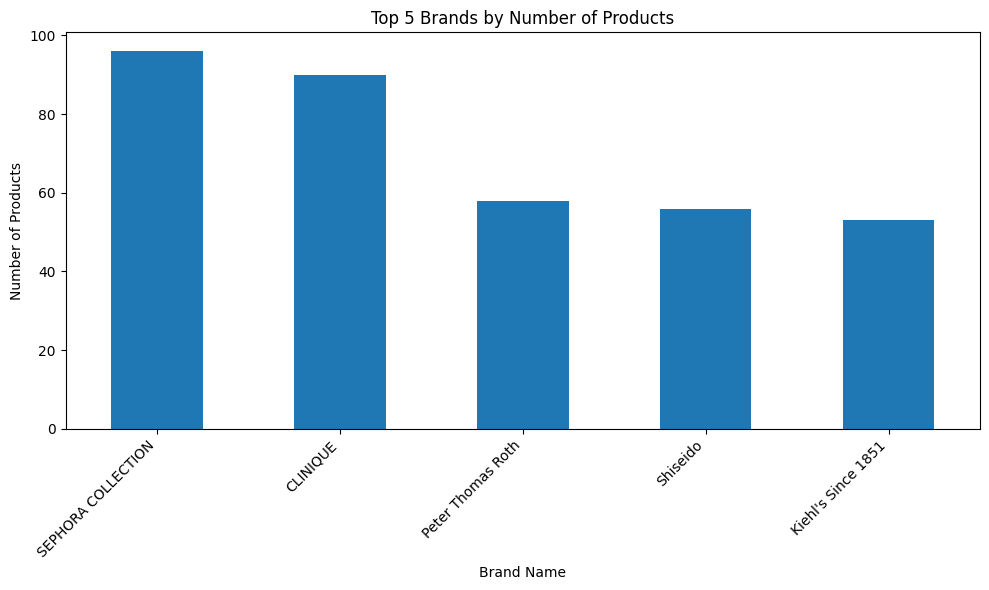

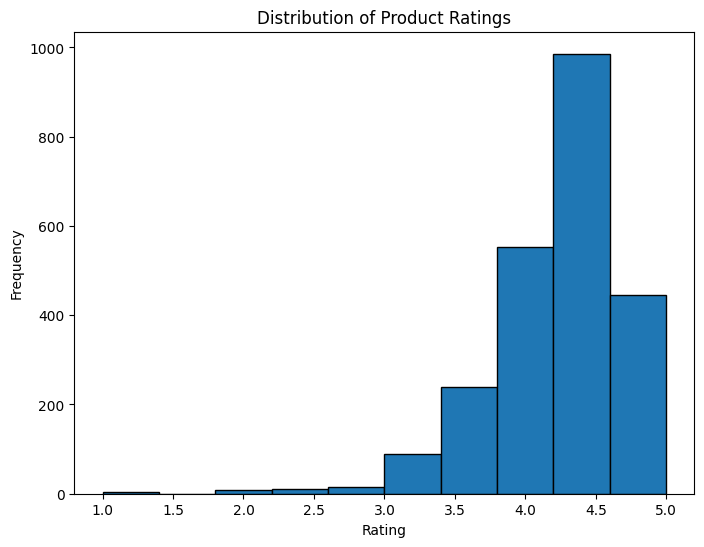

In [28]:
# Group the DataFrame by 'brand_name' and count the number of products for each brand
brand_counts = products['brand_name'].value_counts()

# Select the top 5 brands
top_5_brands = brand_counts.head()

# Create a bar plot for the top 5 brands
plt.figure(figsize=(10, 6))
top_5_brands.plot(kind='bar')
plt.title('Top 5 Brands by Number of Products')
plt.xlabel('Brand Name')
plt.ylabel('Number of Products')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Create a histogram for the 'rating' column
plt.figure(figsize=(8, 6))
plt.hist(products['rating'], bins=10, edgecolor='black')
plt.title('Distribution of Product Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


### **dataset reviews**

check null value

In [29]:
reviews.isnull().sum()

Unnamed: 0                       0
author_id                        0
rating                           0
is_recommended              167988
helpfulness                 561592
total_feedback_count             0
total_neg_feedback_count         0
total_pos_feedback_count         0
submission_time                  0
review_text                   1444
review_title                310654
skin_tone                   170539
eye_color                   209628
skin_type                   111557
hair_color                  226768
product_id                       0
product_name                     0
brand_name                       0
price_usd                        0
dtype: int64

drop rows that have null value

In [30]:
reviews = reviews.dropna()
reviews

,Unnamed: 0,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
5,5,42802569154,4,1.0,1.000000,1,0,1,2023-03-19,The scent isn’t my favourite but it works grea...,Great!,lightMedium,brown,normal,brown,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
6,6,6941883808,2,0.0,0.250000,8,6,2,2023-03-19,I’ll give this 2 stars for nice packaging and ...,Dried my lips out and clogged my pores,light,blue,combination,brown,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
8,8,7656791726,5,1.0,1.000000,1,0,1,2023-03-18,I love this stuff. I first had the sample size...,Must have.,light,blue,normal,blonde,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
9,9,38727834382,5,1.0,1.000000,2,0,2,2023-03-18,I purchased the Sweet Candy scent at my local ...,RUN TO PURCHASE,light,brown,normal,brown,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
21,21,46007186639,1,0.0,0.727273,11,3,8,2023-03-14,Just like Aquaphor just get something cheaper...,Overrated!,fair,blue,normal,blonde,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1094367,49933,5180885110,5,1.0,1.000000,1,0,1,2023-03-16,I love that you have to mix the two items for ...,Love it,medium,hazel,oily,brown,P505120,Early Bird Hydrate + Brighten Set,Drunk Elephant,54.0
1094368,49934,24979779143,5,1.0,0.750000,4,1,3,2023-03-03,I bought this set from drunk elephants website...,Worth it,light,blue,dry,brown,P505120,Early Bird Hydrate + Brighten Set,Drunk Elephant,54.0
1094372,49938,6538326896,3,0.0,0.529412,17,8,9,2022-05-29,Im heading into my 30s so I wanted to splurge ...,Not super worth the price tag,lightMedium,brown,combination,black,P481993,Abeille Royale Intense Repair Youth Oil in Balm,GUERLAIN,235.0
1094376,49942,6696895228,5,1.0,1.000000,3,0,3,2023-02-25,Really good for dry patchy skin!!! My skin has...,Dry skin savior,deep,brown,dry,black,P505174,Soft Clean Moisture Rich Foaming Cleanser,Estée Lauder,26.0


Create new dataframe with needed features `'author_id'`, `'rating'`, `'product_id'`

In [31]:
reviews = reviews[['author_id', 'rating', 'product_id']]
reviews

,author_id,rating,product_id
5,42802569154,4,P420652
6,6941883808,2,P420652
8,7656791726,5,P420652
9,38727834382,5,P420652
21,46007186639,1,P420652
...,...,...,...
1094367,5180885110,5,P505120
1094368,24979779143,5,P505120
1094372,6538326896,3,P481993
1094376,6696895228,5,P505174


In [32]:
num_unique_product = reviews['product_id'].nunique()
print("Number of unique authors:", num_unique_product)

Number of unique authors: 2307


In [33]:
num_unique_authors = reviews['author_id'].nunique()
print("Number of unique authors:", num_unique_authors)

Number of unique authors: 185782


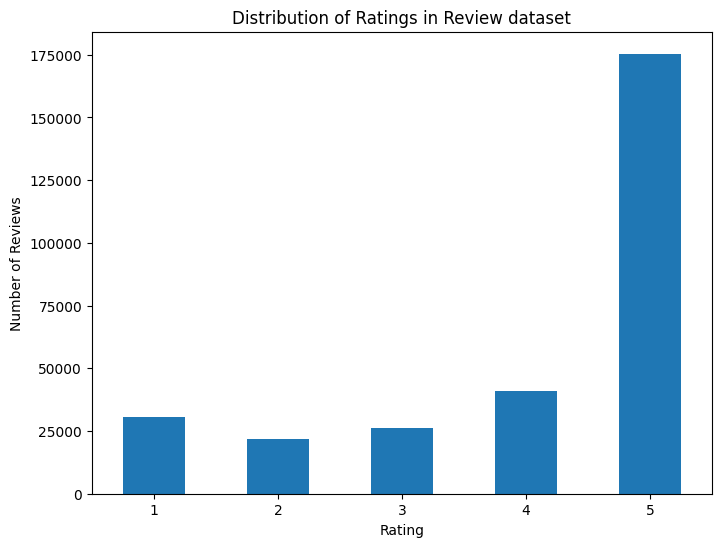

In [34]:
# prompt: create barchart for rating and sort from 1,2,3,4 and 5

# Group the DataFrame by 'rating' and count the number of reviews for each rating
rating_counts = reviews['rating'].value_counts().sort_index()

# Create a bar plot for the rating counts
plt.figure(figsize=(8, 6))
rating_counts.plot(kind='bar')
plt.title('Distribution of Ratings in Review dataset')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.show()


#### **Prepare data for colaborative filtering**

merge the product and reviews datasets and ensure that only the reviews for which there is a corresponding product_id in the product dataset are included

In [35]:
data_2 = pd.merge(reviews, products, on='product_id', how='inner')
data_2

,author_id,rating_x,product_id,product_name,brand_name,category,rating_y
0,42802569154,4,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,Lip Balms & Treatments,4.3508
1,6941883808,2,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,Lip Balms & Treatments,4.3508
2,7656791726,5,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,Lip Balms & Treatments,4.3508
3,38727834382,5,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,Lip Balms & Treatments,4.3508
4,46007186639,1,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,Lip Balms & Treatments,4.3508
...,...,...,...,...,...,...,...
294717,5180885110,5,P505120,Early Bird Hydrate + Brighten Set,Drunk Elephant,Value & Gift Sets,5.0000
294718,24979779143,5,P505120,Early Bird Hydrate + Brighten Set,Drunk Elephant,Value & Gift Sets,5.0000
294719,6538326896,3,P481993,Abeille Royale Intense Repair Youth Oil in Balm,GUERLAIN,Face Masks,3.0000
294720,6696895228,5,P505174,Soft Clean Moisture Rich Foaming Cleanser,Estée Lauder,Face Wash & Cleansers,5.0000


In [36]:
# Count unique values in 'author_id'
num_unique_authors = data_2['author_id'].nunique()
print("Number of unique authors:", num_unique_authors)

# Count unique values in 'product_id'
num_unique_products = data_2['product_id'].nunique()
print("Number of unique products:", num_unique_products)

Number of unique authors: 185782
Number of unique products: 2307


In [37]:
product_counts = data_2['product_id'].value_counts()
print(product_counts)

product_id
P420652    4201
P427417    2940
P411387    2335
P441644    2334
P421275    2230
           ... 
P482661       1
P501550       1
P504594       1
P504881       1
P476571       1
Name: count, Length: 2307, dtype: int64


**create a DataFrame with a total of 100,000 rows while maintaining a diverse set of unique product_id values.**

In [38]:
#Ensure all products are included
all_products = data_2['product_id'].unique()
one_of_each = data_2.groupby('product_id').first().reset_index()

#Calculate how many more rows we need
rows_to_sample = 100000 - len(all_products)

#Sample remaining rows
sampled_rows = data_2.sample(n=rows_to_sample, replace=True)

#Combine one of each product with sampled rows
result = pd.concat([one_of_each, sampled_rows], ignore_index=True)

#Shuffle the results
result = result.sample(frac=1).reset_index(drop=True)

# Verify the result
print(f"Total rows: {len(result)}")
print(f"Unique products: {result['product_id'].nunique()}")

Total rows: 100000
Unique products: 2307


In [39]:
# Count unique values in 'author_id'
num_unique_authors = result['author_id'].nunique()
print("Number of unique authors:", num_unique_authors)

Number of unique authors: 70179


In [40]:
data_2 = result
data_2

,product_id,author_id,rating_x,product_name,brand_name,category,rating_y
0,P434336,7844468545,4,Mini Noni Glow Face Oil,KORA Organics,Mini Size,4.3877
1,P429522,1052590092,5,Super Fluid Daily UV Defense Sunscreen Broad S...,Kiehl's Since 1851,Face Sunscreen,3.6048
2,P455364,6192545835,5,Oat Cleansing Balm,The INKEY List,Face Wash & Cleansers,3.6098
3,P427412,6534893240,4,Alpha Arbutin 2% + HA Hyperpigmentation Serum,The Ordinary,Face Serums,4.0411
4,P472302,25966036626,5,Wild Nettle & Niacinamide Instant Firming Serum,alpyn beauty,Face Serums,4.7631
...,...,...,...,...,...,...,...
99995,P464799,2338213511,3,Potent-C Power Brightening Hydra-Gels,Peter Thomas Roth,Eye Masks,2.6429
99996,P453928,1492661751,5,Retinol Youth Renewal Eye Serum,Murad,Eye Creams & Treatments,4.5278
99997,P426501,2236806740,4,Mini Crème de la Mer Moisturizer,La Mer,Mini Size,4.0566
99998,P442535,5406554879,5,Glow Peel Pads,SEPHORA COLLECTION,Facial Peels,3.9956


drop column that not needed

In [41]:
data_2 = data_2.drop(['product_name', 'brand_name', 'category', 'rating_y'], axis=1)
data_2.rename(columns={'rating_x': 'rating'}, inplace=True)
data_2


,product_id,author_id,rating
0,P434336,7844468545,4
1,P429522,1052590092,5
2,P455364,6192545835,5
3,P427412,6534893240,4
4,P472302,25966036626,5
...,...,...,...
99995,P464799,2338213511,3
99996,P453928,1492661751,5
99997,P426501,2236806740,4
99998,P442535,5406554879,5


#### **encoding**

In [42]:
author_ids = data_2['author_id'].unique().tolist()
user2user_encoded = {x: i for i, x in enumerate(author_ids)}
user_encoded2user = {i: x for i, x in enumerate(author_ids)}
data_2['user'] = data_2['author_id'].map(user2user_encoded)

print('encoded angka ke userID: ', user2user_encoded)

encoded angka ke userID:  {7844468545: 0, '1052590092': 1, 6192545835: 2, '6534893240': 3, '25966036626': 4, '2800853816': 5, '7651539497': 6, '7805300639': 7, '1825053094': 8, '9102898594': 9, '8781884921': 10, 26720927810: 11, 1730310372: 12, '8275288824': 13, '1809094712': 14, '8172431878': 15, '5611175724': 16, '5284061219': 17, '25220311811': 18, '22170895125': 19, '1967685442': 20, '9244774078': 21, '9113403250': 22, '8926531433': 23, '31120591340': 24, 1736625115: 25, '11492226235': 26, '12036150259': 27, '1836652087': 28, 7202719280: 29, '2197935249': 30, '5269132446': 31, '13086761940': 32, '7341618539': 33, 5749441928: 34, '29958512696': 35, '6015652872': 36, '13028203866': 37, '7724046930': 38, 1366394246: 39, '10574475599': 40, '24160984106': 41, '1813811794': 42, '901334103': 43, '1299696799': 44, '2609620911': 45, '22149643881': 46, '1598402372': 47, '5908360795': 48, '1176898335': 49, '1123658846': 50, '33903840113': 51, '27018117539': 52, '1240196124': 53, 7715727727: 5

In [43]:
product_ids = data_2['product_id'].unique().tolist()
product2product_encoded = {x: i for i, x in enumerate(product_ids)}
product_encoded2product = {i: x for i, x in enumerate(product_ids)}
data_2['product'] = data_2['product_id'].map(product2product_encoded)

print('encoded angka ke userID: ', product2product_encoded)

encoded angka ke userID:  {'P434336': 0, 'P429522': 1, 'P455364': 2, 'P427412': 3, 'P472302': 4, 'P417238': 5, 'P454799': 6, 'P416139': 7, 'P420699': 8, 'P309308': 9, 'P476428': 10, 'P469502': 11, 'P467120': 12, 'P440934': 13, 'P442566': 14, 'P456994': 15, 'P446930': 16, 'P442840': 17, 'P427421': 18, 'P422510': 19, 'P444718': 20, 'P479971': 21, 'P471009': 22, 'P420652': 23, 'P442563': 24, 'P458219': 25, 'P448201': 26, 'P455676': 27, 'P427638': 28, 'P442753': 29, 'P456988': 30, 'P422000': 31, 'P482740': 32, 'P472448': 33, 'P476028': 34, 'P394639': 35, 'P411540': 36, 'P466123': 37, 'P459133': 38, 'P474953': 39, 'P473267': 40, 'P476876': 41, 'P12573': 42, 'P248407': 43, 'P503634': 44, 'P455926': 45, 'P427415': 46, 'P435386': 47, 'P448185': 48, 'P478030': 49, 'P410400': 50, 'P4010': 51, 'P429952': 52, 'P460516': 53, 'P126301': 54, 'P428250': 55, 'P424948': 56, 'P415667': 57, 'P411539': 58, 'P453226': 59, 'P435800': 60, 'P446934': 61, 'P462699': 62, 'P481169': 63, 'P375849': 64, 'P421996': 

In [44]:
num_users = len(user_encoded2user)
print(num_users)

num_product = len(product_encoded2product)
print(num_product)

# change rating data type
data_2['rating'] = data_2['rating'].values.astype(np.float32)

# rating minimum value
min_rating = min(data_2['rating'])

# rating maximum value
max_rating = max(data_2['rating'])

print('Number of User: {}, Number of Product: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_product, min_rating, max_rating
))

70179
2307
Number of User: 70179, Number of Product: 2307, Min Rating: 1.0, Max Rating: 5.0


In [45]:
# randomize dataset
data_2 = data_2.sample(frac=1, random_state=42)
data_2

,product_id,author_id,rating,user,product
75721,P471227,1333291115,5.0,57024,891
80184,P470255,8119489553,5.0,52012,165
19864,P466134,24244217038,5.0,18141,193
76699,P442759,2572197257,5.0,57557,241
92991,P441644,1515612849,5.0,50928,224
...,...,...,...,...,...
6265,P460516,5225768139,5.0,6072,53
54886,P448715,5395863461,3.0,44148,1714
76820,P426836,21057128625,5.0,57623,79
860,P443843,988462730,1.0,857,445


**split dataset to train and validation**

In [46]:
# Create a variable x to match user and product data into one value
x = data_2[['user', 'product']].values

# Create a y variable to create a rating of the results
y = data_2['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

# Divide into 80% train data and 20% validation data
train_indices = int(0.8 * data_2.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x, y)

[[57024   891]
 [52012   165]
 [18141   193]
 ...
 [57623    79]
 [  857   445]
 [14680   862]] [1. 1. 1. ... 1. 0. 1.]


## **Modelling**


### **Content Based Filtering**

Done using the cosine similarity calculation of the skincare product category

In [47]:
data_1 = products.copy()
data_1.head()

,product_id,product_name,brand_name,category,rating
89,P439055,GENIUS Sleeping Collagen Moisturizer,Algenist,Moisturizers,4.5413
90,P421277,GENIUS Liquid Collagen Serum,Algenist,Face Serums,4.0259
91,P467602,Triple Algae Eye Renewal Balm Eye Cream,Algenist,Eye Creams & Treatments,4.5306
92,P432045,GENIUS Liquid Collagen Lip Treatment,Algenist,Lip Balms & Treatments,3.8721
93,P311143,SUBLIME DEFENSE Ultra Lightweight UV Defense F...,Algenist,Face Sunscreen,4.4134


IThis code initializes a `TfidfVectorizer`, calculates TF-IDF scores for the `category` column in `data_1`, and creates a DataFrame displaying a sample of the TF-IDF matrix, with rows corresponding to product names and columns to feature names.


In [48]:
# Initialize TfidfVectorizer
tfidf = TfidfVectorizer()

# Perform IDF calculations on cuisine data
tfidf.fit(data_1['category'])

# Mapping array from integer index features to name features
tfidf.get_feature_names_out()

array(['acne', 'aging', 'anti', 'balms', 'bb', 'beauty', 'blemish',
       'blotting', 'body', 'brushes', 'cc', 'cleansers', 'cleansing',
       'creams', 'decollete', 'essences', 'exfoliators', 'eye', 'face',
       'facial', 'for', 'gift', 'hair', 'high', 'holistic', 'lip',
       'makeup', 'masks', 'mini', 'mists', 'moisturizers', 'neck',
       'night', 'oils', 'papers', 'peels', 'removal', 'removers',
       'rollers', 'self', 'serums', 'sets', 'sheet', 'size', 'sunscreen',
       'supplements', 'tanners', 'tech', 'teeth', 'toners', 'tools',
       'treatments', 'value', 'wash', 'wellness', 'whitening', 'wipes'],
      dtype=object)

In [49]:
tfidf_matrix = tfidf.fit_transform(data_1['category'])

# View the tfidf matrix size
tfidf_matrix.shape

(2420, 57)

In [50]:
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [51]:
pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tfidf.get_feature_names_out(),
    index=data_1.product_name
).sample(22, axis=1).sample(10, axis=0)

,serums,face,supplements,mists,anti,removers,lip,blotting,body,tech,...,size,tools,wipes,bb,cleansing,gift,peels,beauty,self,for
product_name,,,,,,,,,,,,,,,,,,,,,
Protini Polypeptide Firming Refillable Moisturizer,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.000000
Mini Adaptogen Deep Moisture Cream with Ashwagandha + Reishi,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.707107,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.000000
Organic Sunless Tan Anti-Aging Face Serum,0.000000,0.378539,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.925585
All About Clean 2-in-1 Charcoal Face Mask + Scrub,0.000000,0.481081,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.000000
Black Tea Firming and De-Puffing Eye Cream,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.000000
Vitamin C Skincare Set,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.57735,0.000000,0.0,0.0,0.000000
Rose & Squalane Deep Hydration Oil-Infused Serum,0.822513,0.568746,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.000000
Do Not Age with Dr. Brandt Transforming Pearl Serum,0.822513,0.568746,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.000000
The Clean Dream Team Set,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.57735,0.000000,0.0,0.0,0.000000


**compute cosine similarity**

In [52]:
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 1.],
       [0., 0., 0., ..., 0., 1., 1.]])

In [53]:
cosine_sim_df = pd.DataFrame(cosine_sim, index=data_1['product_name'], columns=data_1['product_name'])
print('Shape:', cosine_sim_df.shape)

# View the similarity matrix for each product
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (2420, 2420)


product_name,Instant Hydration Set,Dewy Cleanse + Hydrate Duo,Retinol Firming Cream Treatment with Peptides + Hyaluronic Acid,Hand Cream Trio,Full-Size Water Drench Hydra-Pair 2-Piece Kit
product_name,,,,,
Masking Minis 5-Piece Mask Kit,1.0,1.0,0.00000,1.0,1.0
Caffeine Eye Cream,0.0,0.0,0.00000,0.0,0.0
Nutrient-Charged Water Gel,0.0,0.0,0.00000,0.0,0.0
Pekee Cleansing Bar,0.0,0.0,0.21577,0.0,0.0
The Essence Skincare Boosting Treatment – Lunar New Year Edition,0.0,0.0,0.00000,0.0,0.0
10 + 10 Moisturizer with 10% Vitamin C + 10% Peptide Complex + Ceramides,0.0,0.0,0.00000,0.0,0.0
Mini Hyaluronic Serum,0.0,0.0,0.00000,0.0,0.0
De-Puffing Jade Facial Roller,0.0,0.0,0.00000,0.0,0.0
Full-Size Water Drench Hydra-Pair 2-Piece Kit,1.0,1.0,0.00000,1.0,1.0


**Create product recommendation with cosine similarity**

In [54]:
def skincare_recommendations(product_name, similarity_data=cosine_sim_df, items=data_1[['product_name', 'brand_name', 'category']], k=5):
    """
    Provides product recommendations based on similarity.

    Parameters:
    ---
    product_name : str
        The name of the product for which recommendations are sought. This should be present in the index of the similarity DataFrame.
    similarity_data : pd.DataFrame
        A DataFrame containing similarity scores, symmetric, with products as both index and columns.
    items : pd.DataFrame
        A DataFrame containing product names and other features used to define similarity.
    k : int
        The number of recommendations to return.
    ---

    The function retrieves the top k most similar products based on the similarity scores provided in the similarity DataFrame.
    """

    # Convert the similarity scores for the given product into a numpy array and find the indices of the top k most similar products
    index = similarity_data.loc[:, product_name].to_numpy().argpartition(range(-1, -k, -1))

    # Retrieve the names of the top k most similar products
    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    # Exclude the original product from the list of recommendations
    closest = closest.drop(product_name, errors='ignore')

    # Return the top k recommended products along with their features
    return pd.DataFrame(closest).merge(items).head(k)

In [55]:
#code to not truncate product name
pd.set_option('display.max_colwidth', None)

data_1[data_1.product_name.eq('Retinol Recovery Eye Cream')]
skincare_recommendations('Retinol Recovery Eye Cream')

,product_name,brand_name,category
0,Pep-Start Eye Cream,CLINIQUE,Eye Creams & Treatments
1,Eye Doctor Moisture Care For Skin Around Eyes,Origins,Eye Creams & Treatments
2,Ginzing Vitamin C Eye Cream to Brighten and Depuff,Origins,Eye Creams & Treatments
3,Brightening Eye Cream Mineral SPF 15 with Peptides,Soleil Toujours,Eye Creams & Treatments
4,Green Tea Hyaluronic Acid Hydrating Eye Cream,innisfree,Eye Creams & Treatments


**Evaluate Result**

Because all the result came out with same category, Eye Creams & Treatments, we can conclude that the result is relevant. Here's how to evaluate the result using **Recall at K**.

In [56]:
# Define the prediction results
predicted_products = [
    'Pep-Start Eye Cream',
    'Eye Doctor Moisture Care For Skin Around Eyes',
    'Ginzing Vitamin C Eye Cream to Brighten and Depuff',
    'Brightening Eye Cream Mineral SPF 15 with Peptides	',
    'Green Tea Hyaluronic Acid Hydrating Eye Cream'
]

# Define the relevant products
relevant_products = [
    'Pep-Start Eye Cream',
    'Eye Doctor Moisture Care For Skin Around Eyes',
    'Ginzing Vitamin C Eye Cream to Brighten and Depuff',
    'Brightening Eye Cream Mineral SPF 15 with Peptides	',
    'Green Tea Hyaluronic Acid Hydrating Eye Cream'
]

# Define K (number of top recommendations)
k = 5

# Function to compute recall at K
def recall_at_k(predicted, relevant, k):
    predicted_k = predicted[:k]  # Top K predicted items
    relevant_count = len(set(predicted_k) & set(relevant))  # Count of relevant items in top K
    return relevant_count / len(relevant) if relevant else 0

# Calculate recall at K
recall_score = recall_at_k(predicted_products, relevant_products, k)
print(f"Recall at {k}: {recall_score * 100:.2f}%")

Recall at 5: 100.00%


### **Collaborative filtering**

Create neural network model for recommendation systems using embeddings to represent users and products. Calculates the predicted rating by combining user and product embeddings with biases, and applies a sigmoid activation function to the result.


In [57]:
class RecommenderNet(keras.Model):
    def __init__(self, num_users, num_product, embedding_size, **kwargs):
        super(RecommenderNet, self).__init__(**kwargs)
        self.num_users = num_users
        self.num_product = num_product
        self.embedding_size = embedding_size
        self.user_embedding = layers.Embedding(
            num_users,
            embedding_size,
            embeddings_initializer='he_normal',
            embeddings_regularizer=keras.regularizers.l2(1e-6)
        )
        self.user_bias = layers.Embedding(num_users, 1)
        self.product_embedding = layers.Embedding(
            num_product,
            embedding_size,
            embeddings_initializer='he_normal',
            embeddings_regularizer=keras.regularizers.l2(1e-6)
        )
        self.product_bias = layers.Embedding(num_product, 1)

    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:, 0])
        user_bias = self.user_bias(inputs[:, 0])
        product_vector = self.product_embedding(inputs[:, 1])
        product_bias = self.product_bias(inputs[:, 1])

        dot_user_product = tensorflow.tensordot(user_vector, product_vector, 2)

        x = dot_user_product + user_bias + product_bias

        return tensorflow.nn.sigmoid(x)

In [58]:
model = RecommenderNet(num_users, num_product, 50)

model.compile(
    loss=BinaryCrossentropy(),
    optimizer=Adam(learning_rate=0.001),
    metrics=[RootMeanSquaredError()]
)

In [59]:
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 128,
    epochs = 50,
    validation_data = (x_val, y_val)
)

Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 59s 92ms/step - loss: 0.6528 - root_mean_squared_error: 0.4101 - val_loss: 0.5509 - val_root_mean_squared_error: 0.3447
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 86ms/step - loss: 0.6179 - root_mean_squared_error: 0.3575 - val_loss: 0.6205 - val_root_mean_squared_error: 0.3880
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 85s 91ms/step - loss: 0.5403 - root_mean_squared_error: 0.3410 - val_loss: 0.6027 - val_root_mean_squared_error: 0.3767
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 49s 78ms/step - loss: 0.5339 - root_mean_squared_error: 0.3376 - val_loss: 0.6008 - val_root_mean_squared_error: 0.3754
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 84s 82ms/step - loss: 0.5307 - root_mean_squared_error: 0.3351 - val_loss: 0.6052 - val_root_mean_squared_error: 0.3781
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 50s 80ms/step - loss: 0.5327 - root_mean_squared_error: 0.3355 - val_loss: 0.6008 - val_root_mean_squared_error: 0.3750
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 

**plot metrics model**

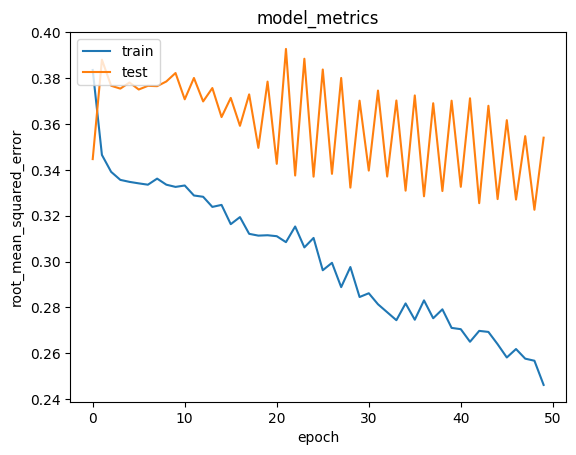

In [60]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Create product recommendation with created model**

In [61]:
import random

def get_recommendations(model, user_id, product_df, num_recommendations=10):
    # Get a list of all products
    all_products = list(product2product_encoded.values())

    # Get products the user has already rated
    user_products = data_2[data_2['user'] == user2user_encoded[user_id]]['product'].tolist()

    # Find products the user hasn't rated
    products_to_predict = list(set(all_products) - set(user_products))

    # Create input data for predictions
    user_array = np.array([[user2user_encoded[user_id]] * len(products_to_predict)])
    product_array = np.array([products_to_predict])
    user_product_array = np.transpose(np.concatenate([user_array, product_array]))

    # Make predictions
    predictions = model.predict(user_product_array).flatten()

    # Get top N recommendations
    top_indices = predictions.argsort()[-num_recommendations:][::-1]
    recommended_product_ids = [product_encoded2product[products_to_predict[x]] for x in top_indices]

    # Get additional product information
    recommended_products = product_df[product_df['product_id'].isin(recommended_product_ids)].copy()
    recommended_products['predicted_rating'] = predictions[top_indices]
    recommended_products = recommended_products.sort_values('predicted_rating', ascending=False)

    return recommended_products

#load product data
product_df = products.copy()

# Select a random user
random_user = random.choice(list(user2user_encoded.keys()))

# Get recommendations
recommendations = get_recommendations(model, random_user, product_df)

# Print recommendations
print(f"Top 10 recommendations for user {random_user}:")
for i, (_, row) in enumerate(recommendations.iterrows(), 1):
    print(f"{i}. Product: {row['product_name']}")
    print(f"   Brand: {row['brand_name']}")
    print(f"   Category: {row['category']}")
    print(f"   Actual Rating: {row['rating']}")
    print()

73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
Top 10 recommendations for user 1693031887:
1. Product: Pore Perfecting Liquid Exfoliator with 2% BHA + Borage
   Brand: alpyn beauty
   Category: Exfoliators
   Actual Rating: 4.9231

2. Product: Rice Drops Face Oil Hydrating Serum
   Brand: DAMDAM
   Category: Face Oils
   Actual Rating: 4.8548

3. Product: Vitamin C Lactic Dewy Deep Cream
   Brand: Dr. Dennis Gross Skincare
   Category: Moisturizers
   Actual Rating: 4.8008

4. Product: Retinol Remix 1% Retinol Treatment With Peptide & Tranexamic Acid
   Brand: iNNBEAUTY PROJECT
   Category: Face Serums
   Actual Rating: 4.7545

5. Product: Absolue Soft Cream Revitalizing & Brightening Moisturizer
   Brand: Lancôme
   Category: Moisturizers
   Actual Rating: 4.6763

6. Product: SuperBeauty Daily Antioxidant SkinSupplement
   Brand: Moon Juice
   Category: Beauty Supplements
   Actual Rating: 4.8696

7. Product: Sacred Sleep Overnight Repair with Retinol
   Brand: Saint Jane Beauty
   Category: 